   ID        Date   Brand Processor  RAM_GB  Storage_GB  Price_USD    Model
0   1  2023-01-01      HP        i7      16         128    1694.17     Envy
1   2  2023-01-02    Acer        i7       4         256    1605.62   Aspire
2   3  2023-01-03    Acer   Ryzen 9       4        1024     335.74    Nitro
3   4  2023-01-04    Asus   Ryzen 7      32         512    1903.31      ROG
4   5  2023-01-05  Lenovo    M1 Pro       8        1024    1011.77  IdeaPad
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          500 non-null    int64  
 1   Date        500 non-null    object 
 2   Brand       500 non-null    object 
 3   Processor   500 non-null    object 
 4   RAM_GB      500 non-null    int64  
 5   Storage_GB  500 non-null    int64  
 6   Price_USD   500 non-null    float64
 7   Model       500 non-null    object 
dtypes: float64(1), int64(3), 

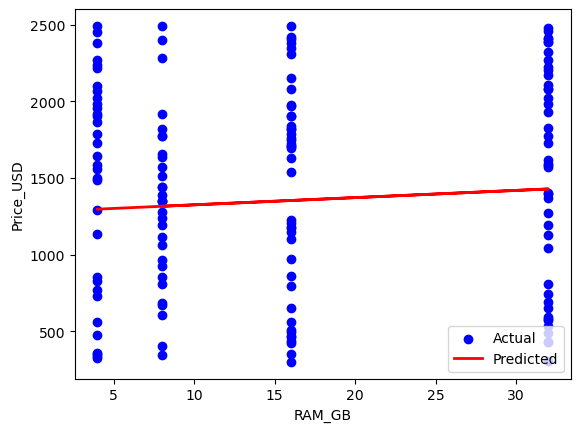

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'laptop_price_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Inspect the dataset
print(data.head())
print(data.info())

# Preprocess the data
feature_column = 'RAM_GB'
target_column = 'Price_USD'

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna(subset=[feature_column, target_column])

# Split the data into training and testing sets
X = data[[feature_column]]
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Make predictions
# Example: Predict the price for a laptop with 16 GB RAM
new_data = pd.DataFrame({feature_column: [16]})
predicted_price = model.predict(new_data)
print(f'Predicted Price for 16 GB RAM: {predicted_price[0]}')

# Plotting the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.legend()
plt.show()


In [4]:
data

,ID,Date,Brand,Processor,RAM_GB,Storage_GB,Price_USD,Model
0,1,2023-01-01,HP,i7,16,128,1694.17,Envy
1,2,2023-01-02,Acer,i7,4,256,1605.62,Aspire
2,3,2023-01-03,Acer,Ryzen 9,4,1024,335.74,Nitro
3,4,2023-01-04,Asus,Ryzen 7,32,512,1903.31,ROG
4,5,2023-01-05,Lenovo,M1 Pro,8,1024,1011.77,IdeaPad
...,...,...,...,...,...,...,...,...
495,496,2024-05-10,Dell,i3,16,1024,1720.60,XPS
496,497,2024-05-11,Acer,Ryzen 7,16,512,1423.25,Aspire
497,498,2024-05-12,Acer,i9,16,128,563.90,Nitro
498,499,2024-05-13,Dell,i3,4,1024,986.54,XPS


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = 'laptop_price_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Preprocess the data
feature_column = 'Processor'
target_column = 'Price_USD'

# Drop rows with missing values (if any)
data = data.dropna(subset=[feature_column, target_column])

# One-hot encode the 'Processor' column
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(data[[feature_column]])

# Create a DataFrame with the encoded features
encoded_feature_names = encoder.get_feature_names_out([feature_column])
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the encoded features with the target column
processed_data = pd.concat([encoded_df, data[target_column]], axis=1)

# Split the data into training and testing sets
X = processed_data.drop(columns=[target_column])
y = processed_data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Make predictions
# Example: Predict the price for a laptop with a specific processor type (e.g., 'i7')
processor_type = 'i7'
processor_encoded = encoder.transform([[processor_type]])
predicted_price = model.predict(processor_encoded)
print(f'Predicted Price for {processor_type} processor: {predicted_price[0]}')


C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mean Squared Error: 437984.26178100007
R-squared: -0.04180387829508492
Predicted Price for i7 processor: 1222.0


C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Vikram\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 421249.28602658847
R-squared: -0.001997510428748628
Ridge Mean Squared Error: 419912.1531332646
Ridge R-squared: 0.0011830381790852718
Lasso Mean Squared Error: 420769.80820616684
Lasso R-squared: -0.0008570085969237251


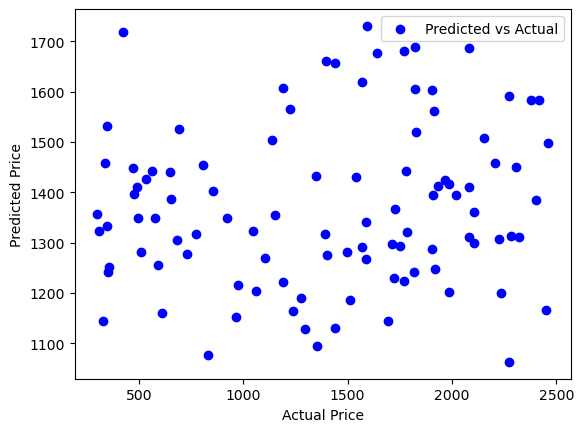

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'laptop_price_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Preprocess the data
feature_columns = ['Brand', 'Processor', 'RAM_GB', 'Storage_GB', 'Model']
target_column = 'Price_USD'

# Drop rows with missing values
data = data.dropna(subset=feature_columns + [target_column])

# Define the preprocessing for numeric and categorical features
numeric_features = ['RAM_GB', 'Storage_GB']
categorical_features = ['Brand', 'Processor', 'Model']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Using drop='first' to avoid dummy variable trap

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split the data into training and testing sets
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Ridge Regression
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Ridge Mean Squared Error: {ridge_mse}')
print(f'Ridge R-squared: {ridge_r2}')

# Lasso Regression
lasso_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=0.1))
])
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Lasso Mean Squared Error: {lasso_mse}')
print(f'Lasso R-squared: {lasso_r2}')

# Plotting the results (for the original Linear Regression model)
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


Gradient Boosting Regressor MSE: 419186.846709118
Gradient Boosting Regressor R-squared: 0.0029082760736061086
Random Forest Regressor MSE: 464614.7091051968
Random Forest Regressor R-squared: -0.10514794273764116


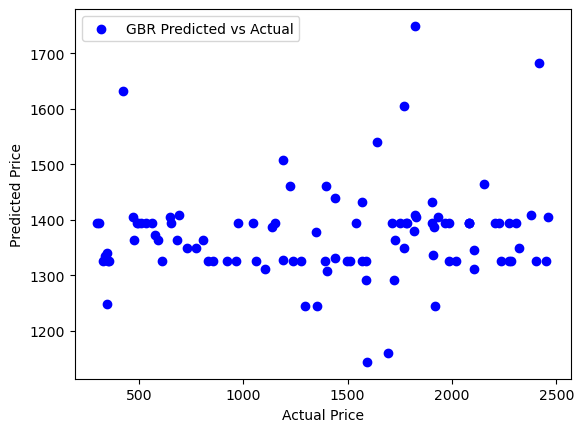

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'laptop_price_prediction_dataset.csv'
data = pd.read_csv(file_path)

# Preprocess the data
feature_columns = ['Brand', 'Processor', 'RAM_GB', 'Storage_GB', 'Model']
target_column = 'Price_USD'

# Drop rows with missing values
data = data.dropna(subset=feature_columns + [target_column])

# Define the preprocessing for numeric and categorical features
numeric_features = ['RAM_GB', 'Storage_GB']
categorical_features = ['Brand', 'Processor', 'Model']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Using drop='first' to avoid dummy variable trap

# Create the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X = data[feature_columns]
y = data[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting Regressor
gbr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor())
])

# Hyperparameter tuning for Gradient Boosting Regressor
param_grid_gbr = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

best_gbr = grid_search_gbr.best_estimator_
gbr_pred = best_gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print(f'Gradient Boosting Regressor MSE: {gbr_mse}')
print(f'Gradient Boosting Regressor R-squared: {gbr_r2}')

# Random Forest Regressor
rfr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Hyperparameter tuning for Random Forest Regressor
param_grid_rfr = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20]
}

grid_search_rfr = GridSearchCV(rfr, param_grid_rfr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)

best_rfr = grid_search_rfr.best_estimator_
rfr_pred = best_rfr.predict(X_test)
rfr_mse = mean_squared_error(y_test, rfr_pred)
rfr_r2 = r2_score(y_test, rfr_pred)

print(f'Random Forest Regressor MSE: {rfr_mse}')
print(f'Random Forest Regressor R-squared: {rfr_r2}')

# Plotting the results (for the best model)
plt.scatter(y_test, gbr_pred, color='blue', label='GBR Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()


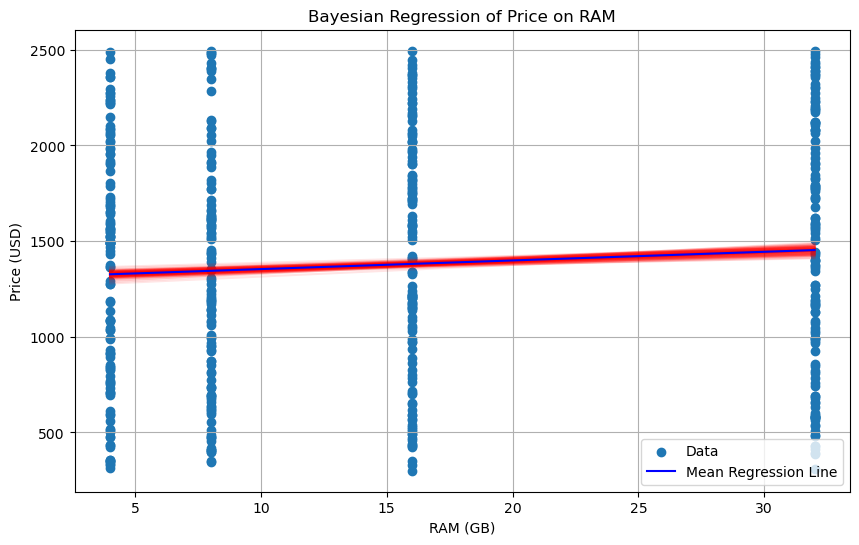

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, norm

# Load your data
data = pd.read_csv('laptop_price_prediction_dataset.csv')

# Extract the relevant columns
X = data['RAM_GB'].values
y = data['Price_USD'].values

# Standardize the predictor
X_standardized = (X - X.mean()) / X.std()

# Perform linear regression using scipy to get initial estimates
slope, intercept, _, _, _ = linregress(X_standardized, y)

# Bayesian linear regression assuming normal priors
alpha_prior = norm(loc=intercept, scale=10)
beta_prior = norm(loc=slope, scale=10)
sigma_prior = norm(loc=0, scale=1)

# Number of samples for the posterior
n_samples = 1000

# Sample from the posterior distributions
alpha_samples = alpha_prior.rvs(n_samples)
beta_samples = beta_prior.rvs(n_samples)
sigma_samples = np.abs(sigma_prior.rvs(n_samples))

# Predictive distribution
X_pred = np.linspace(X.min(), X.max(), 100)
X_pred_standardized = (X_pred - X.mean()) / X.std()
y_preds = np.array([alpha_samples[i] + beta_samples[i] * X_pred_standardized for i in range(n_samples)])

# Plotting the results
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X, y, label='Data')

# Plot regression lines from posterior samples
for i in range(0, n_samples, int(n_samples / 100)):  # plot a subset of lines
    plt.plot(X_pred, y_preds[i], color='red', alpha=0.1)

# Plot the mean regression line
y_pred_mean = alpha_samples.mean() + beta_samples.mean() * X_pred_standardized
plt.plot(X_pred, y_pred_mean, color='blue', label='Mean Regression Line')

plt.xlabel('RAM (GB)')
plt.ylabel('Price (USD)')
plt.legend()
plt.title('Bayesian Regression of Price on RAM')
plt.grid(True)
plt.show()